In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import joblib
from google.colab import files

In [148]:
uploaded = files.upload()

Saving RY.csv to RY.csv


In [149]:
csv1 = pd.read_csv(io.BytesIO(uploaded['RY.csv']))

In [150]:
csv1.shape

(1259, 7)

In [151]:
csv1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-06,63.180000,63.529999,62.919998,63.509998,53.209068,957400
1,2016-09-07,63.459999,63.570000,62.759998,63.099998,52.865570,746900
2,2016-09-08,63.009998,63.130001,62.540001,62.709999,52.538822,825300
3,2016-09-09,62.230000,62.230000,61.369999,61.840000,51.809940,1262000
4,2016-09-12,61.340000,61.930000,61.090000,61.790001,51.768047,1124700
5,2016-09-13,61.160000,61.209999,60.580002,60.869999,50.997261,1165100
6,2016-09-14,60.669998,61.189999,60.500000,60.689999,50.846451,856600
7,2016-09-15,60.639999,61.939999,60.639999,61.840000,51.809940,1008400
8,2016-09-16,61.389999,61.389999,60.730000,61.110001,51.198334,918700
9,2016-09-19,61.529999,61.790001,61.000000,61.099998,51.189960,703400


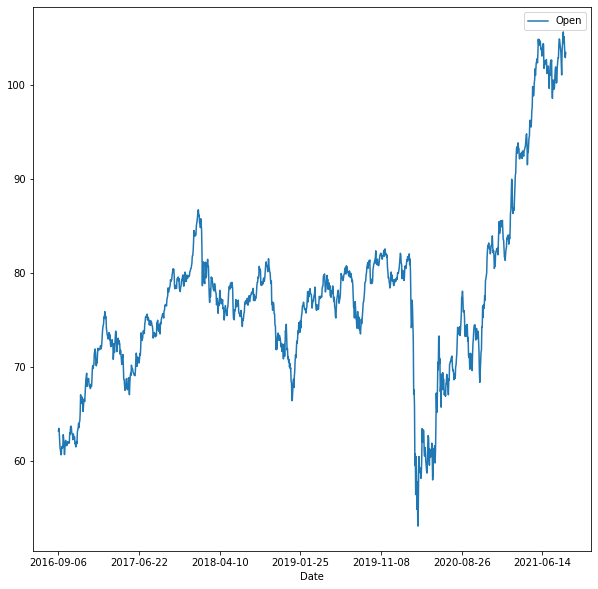

In [189]:

csv1.plot("Date", "Open",figsize=(10,10))

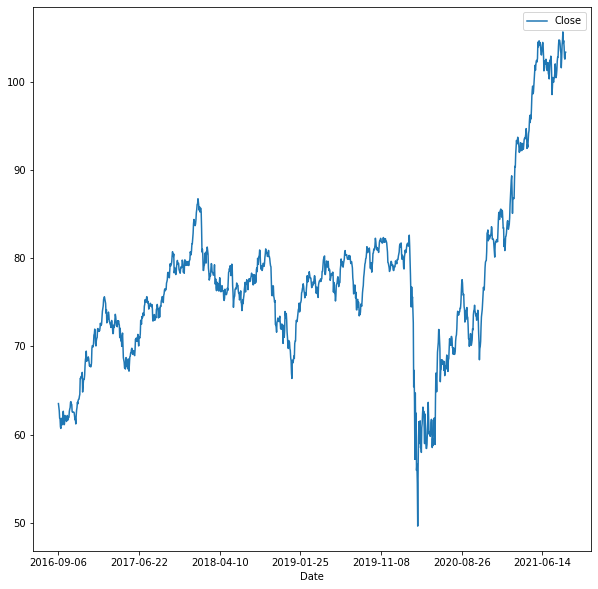

In [190]:
csv1.plot("Date", "Close",figsize=(10,10))


In [156]:
csv1_new=csv1.set_index('Date')
csv1_new.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,63.180000,63.529999,62.919998,63.509998,53.209068,957400
2016-09-07,63.459999,63.570000,62.759998,63.099998,52.865570,746900
2016-09-08,63.009998,63.130001,62.540001,62.709999,52.538822,825300
2016-09-09,62.230000,62.230000,61.369999,61.840000,51.809940,1262000
2016-09-12,61.340000,61.930000,61.090000,61.790001,51.768047,1124700


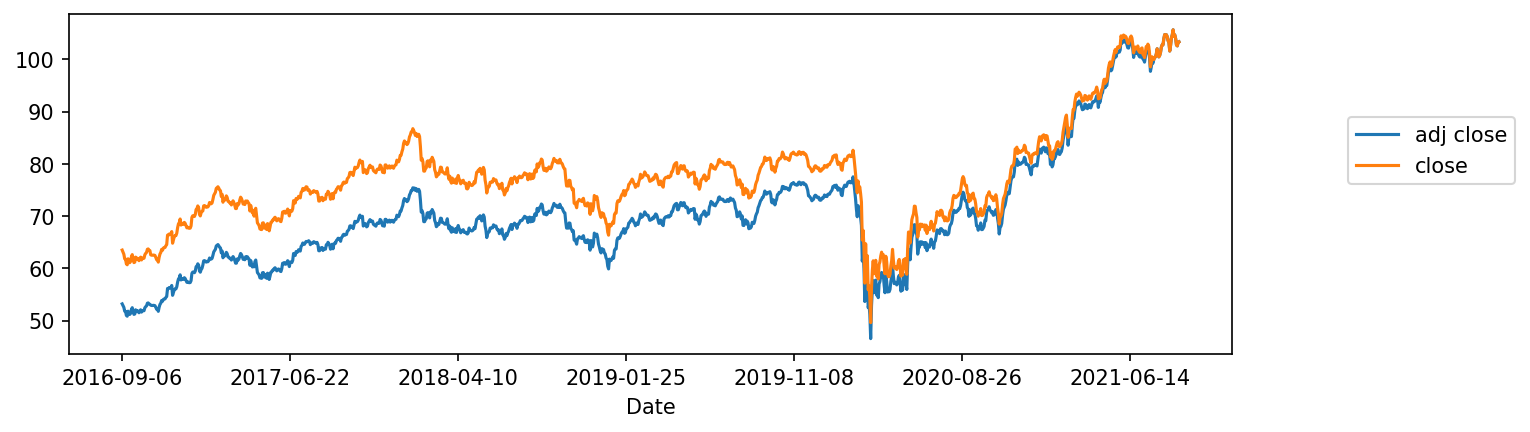

In [157]:
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
csv1_new['Adj Close'].plot(ax=ax,label='adj close')
csv1_new['Close'].plot(ax=ax,label='close')
plt.legend(loc=(1.1,0.5))
plt.show()

In [158]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

In [159]:
X = csv1_new.drop('Adj Close',axis=1)
y = csv1_new['Adj Close']

In [160]:
X

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-06,63.180000,63.529999,62.919998,63.509998,957400
2016-09-07,63.459999,63.570000,62.759998,63.099998,746900
2016-09-08,63.009998,63.130001,62.540001,62.709999,825300
2016-09-09,62.230000,62.230000,61.369999,61.840000,1262000
2016-09-12,61.340000,61.930000,61.090000,61.790001,1124700
...,...,...,...,...,...
2021-08-30,105.120003,105.129997,103.949997,104.000000,3211100
2021-08-31,104.129997,104.449997,102.699997,102.760002,1105800
2021-09-01,103.139999,103.220001,102.339996,102.589996,754800


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [162]:
model = LinearRegression()

In [163]:
model.fit(X_train,y_train)

LinearRegression()

In [164]:
test_predictions = model.predict(X_test)

In [165]:
test_predictions_df = pd.DataFrame(test_predictions, columns = ['Predicted Close'])

In [166]:
test_predictions_df.head()


,Predicted Close
0,59.781590
1,49.914327
2,67.114569
3,52.963585
4,66.923643


In [167]:
test_predictions

array([ 59.78158976,  49.91432719,  67.11456917,  52.96358544,
        66.92364318,  70.61448361,  70.9049554 ,  51.52029765,
        79.9583137 ,  63.52787539,  64.07195573,  87.97246735,
        73.83797137,  53.5275398 ,  54.89118688,  72.59042246,
        49.0297706 ,  90.49180523,  67.96115665,  69.87475864,
        71.64249728,  76.16423141,  72.72980782,  63.10403206,
        71.59501596,  74.71346994,  77.06159732,  68.43358917,
        51.53300489, 102.27399298,  64.94226864,  66.13144642,
        68.60526855,  72.83379485,  72.79050637,  61.33035009,
        72.47520474,  52.59087053, 103.51833771,  73.28315124,
        65.95578122, 102.50284017,  74.42682308,  77.60654799,
        51.06642041,  71.57133678,  48.56115286,  67.02924778,
        73.12494783,  73.47414191,  73.43255842,  63.6917312 ,
        66.04179973,  67.29386872, 101.16942941,  73.28579675,
        59.43469593,  72.82566146,  65.43029128,  63.6193036 ,
        60.82376656,  76.1865865 ,  74.4066267 ,  74.07

In [168]:
y_test_df = y_test.to_frame()

In [169]:
y_test_df

,Adj Close
Date,
2017-04-28,58.995174
2020-05-22,55.964172
2017-02-22,64.042038
2016-10-20,53.183937
2019-01-22,67.614777
...,...
2018-05-21,69.690674
2016-09-22,52.480175
2020-05-01,57.085934


In [170]:
y_test1=y_test_df.reset_index()

In [171]:
y_test1

,Date,Adj Close
0,2017-04-28,58.995174
1,2020-05-22,55.964172
2,2017-02-22,64.042038
3,2016-10-20,53.183937
4,2019-01-22,67.614777
...,...,...
247,2018-05-21,69.690674
248,2016-09-22,52.480175
249,2020-05-01,57.085934
250,2021-01-26,81.976311


In [172]:
frames = [y_test1, test_predictions_df]
csv1_new =pd.concat(frames, axis=1)

In [173]:
csv1_new=csv1_new.set_index('Date')

In [174]:
csv1_new

,Adj Close,Predicted Close
Date,,
2017-04-28,58.995174,59.781590
2020-05-22,55.964172,49.914327
2017-02-22,64.042038,67.114569
2016-10-20,53.183937,52.963585
2019-01-22,67.614777,66.923643
...,...,...
2018-05-21,69.690674,70.949209
2016-09-22,52.480175,52.240754
2020-05-01,57.085934,50.043275


In [175]:
csv1_new=csv1_new.reset_index()

In [176]:
csv1_new

,Date,Adj Close,Predicted Close
0,2017-04-28,58.995174,59.781590
1,2020-05-22,55.964172,49.914327
2,2017-02-22,64.042038,67.114569
3,2016-10-20,53.183937,52.963585
4,2019-01-22,67.614777,66.923643
...,...,...,...
247,2018-05-21,69.690674,70.949209
248,2016-09-22,52.480175,52.240754
249,2020-05-01,57.085934,50.043275
250,2021-01-26,81.976311,77.377403


In [177]:

# checking datatype
print(type(csv1_new.Date[0]))
 
# convert to date
csv1_new['Date'] = pd.to_datetime(csv1_new['Date'])
 
# verify datatype
print(type(csv1_new.Date[0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [178]:
csv1_new = csv1_new.sort_values(by='Date')

In [179]:
csv1_new

,Date,Adj Close,Predicted Close
13,2016-09-06,53.209068,53.527540
37,2016-09-08,52.538822,52.590871
248,2016-09-22,52.480175,52.240754
113,2016-09-30,51.910473,51.405549
7,2016-10-04,51.508320,51.520298
...,...,...,...
198,2021-08-03,100.750000,99.399047
103,2021-08-17,103.599998,102.400011
29,2021-08-23,104.160004,102.273993
38,2021-08-24,104.720001,103.518338


In [180]:
csv1_new=csv1_new.set_index('Date')

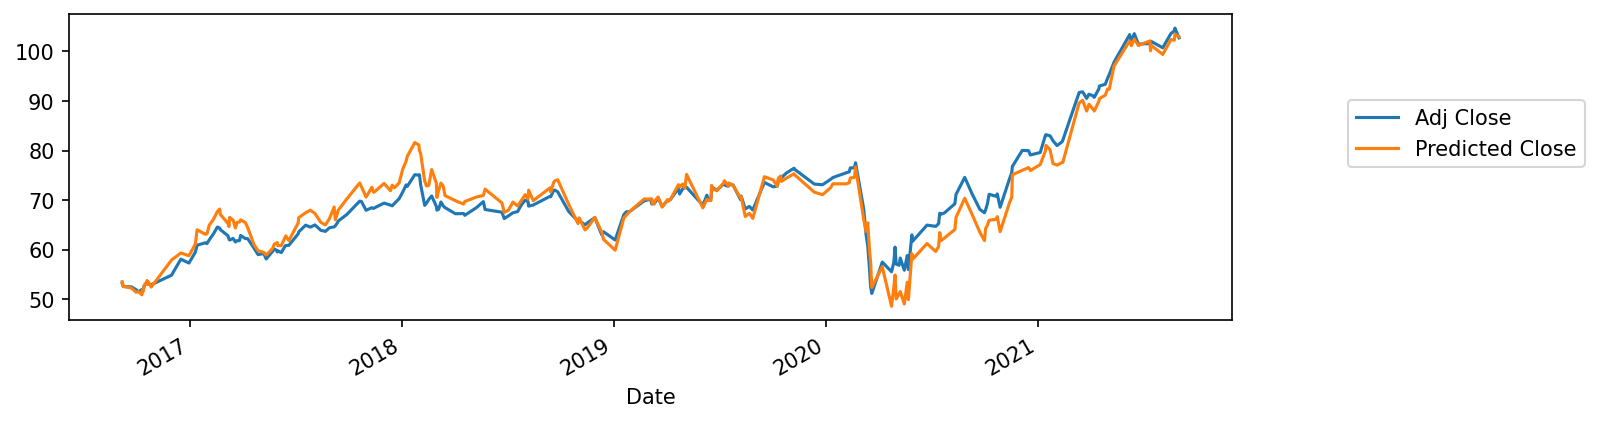

In [181]:
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
csv1_new['Adj Close'].plot(ax=ax,label='Adj Close')
csv1_new['Predicted Close'].plot(ax=ax,label='Predicted Close')
plt.legend(loc=(1.1,0.5))
plt.show()

In [182]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [183]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [185]:
MAE

2.265913175469085

In [187]:
MSE

8.175711900528967

In [188]:
RMSE

2.859320181534234